In [24]:
import pandas as pd

titanic = pd.read_csv("./titanic.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [25]:
#label encoder로 성별 칼럼 만들기
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [26]:
#결측치 걸러내기
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  gender     1045 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 126.5+ KB


In [27]:
y = titanic['survived'].values
X = titanic[['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare']].values


In [28]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(X)

X_ss = SS.transform(X)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

log_reg_kf = LogisticRegression(random_state=13, solver='liblinear')
kfold = KFold(n_splits=5)
cv_accuracy = []

In [30]:
from sklearn.metrics import accuracy_score

for train_idx, test_idx in kfold.split(X_ss):
    X_train, X_test = X_ss[train_idx], X_ss[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    log_reg_kf.fit(X_train, y_train)
    
    pred = log_reg_kf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    cv_accuracy.append(accuracy)

In [31]:
#각 fold마다의 성능
cv_accuracy

[0.7655502392344498,
 0.8660287081339713,
 0.8229665071770335,
 0.7464114832535885,
 0.7081339712918661]

In [32]:
import numpy as np
np.mean(cv_accuracy)

0.7818181818181819

In [33]:
#각 폴드마다 survived의 비율이 다르다.
for train_idx, test_idx in kfold.split(X_ss):
    X_train, X_test = X_ss[train_idx], X_ss[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    print(np.unique(y_test, return_counts=True))

(array([0, 1], dtype=int64), array([ 74, 135], dtype=int64))
(array([0, 1], dtype=int64), array([107, 102], dtype=int64))
(array([0, 1], dtype=int64), array([125,  84], dtype=int64))
(array([0, 1], dtype=int64), array([155,  54], dtype=int64))
(array([0, 1], dtype=int64), array([157,  52], dtype=int64))


In [34]:
from sklearn.model_selection import StratifiedKFold

log_reg_kf = LogisticRegression(random_state=13, solver='liblinear')
skfold = StratifiedKFold(n_splits=5)
cv_accuracy = []

In [35]:
for train_idx, test_idx in skfold.split(X_ss, y):
    X_train, X_test = X_ss[train_idx], X_ss[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    print(np.unique(y_test, return_counts=True))

(array([0, 1], dtype=int64), array([123,  86], dtype=int64))
(array([0, 1], dtype=int64), array([123,  86], dtype=int64))
(array([0, 1], dtype=int64), array([124,  85], dtype=int64))
(array([0, 1], dtype=int64), array([124,  85], dtype=int64))
(array([0, 1], dtype=int64), array([124,  85], dtype=int64))


In [36]:
for train_idx, test_idx in skfold.split(X_ss, y):
    X_train, X_test = X_ss[train_idx], X_ss[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    log_reg_kf.fit(X_train, y_train)
    pred = log_reg_kf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    cv_accuracy.append(accuracy)

In [37]:
cv_accuracy

[0.569377990430622,
 0.861244019138756,
 0.8133971291866029,
 0.7368421052631579,
 0.6555023923444976]

In [38]:
np.mean(cv_accuracy)

0.7272727272727273

In [39]:
#반복문 통한 교차 검증이 귀찮으니
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg_kf, X_ss, y, scoring='accuracy', cv=5)

In [40]:
scores

array([0.56937799, 0.86124402, 0.81339713, 0.73684211, 0.65550239])

In [41]:
np.mean(scores)

0.7272727272727273

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

SS = StandardScaler()
SS.fit(X)
X_ss = SS.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=13)

log_reg = LogisticRegression(random_state=13, solver='liblinear')
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=13, solver='liblinear')

In [44]:
from sklearn.preprocessing import Binarizer
custom_threshold = 0.5
pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

In [45]:
binarizer = Binarizer(threshold= custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[:5]


array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Threshold: ', custom_threshold)
print('Accuracy: ', accuracy_score(y_test, custom_predict))
print('Precision: ', precision_score(y_test, custom_predict))
print('Recall: ', recall_score(y_test, custom_predict))




Threshold:  0.5
Accuracy:  0.7559808612440191
Precision:  0.7534246575342466
Recall:  0.625


In [47]:
custom_threshold = 0.3

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Threshold: ', custom_threshold)
print('Accuracy: ', accuracy_score(y_test, custom_predict))
print('Precision: ', precision_score(y_test, custom_predict))
print('Recall: ', recall_score(y_test, custom_predict))

Threshold:  0.3
Accuracy:  0.7607655502392344
Precision:  0.6938775510204082
Recall:  0.7727272727272727


In [48]:
custom_threshold = 0.8

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Threshold: ', custom_threshold)
print('Accuracy: ', accuracy_score(y_test, custom_predict))
print('Precision: ', precision_score(y_test, custom_predict))
print('Recall: ', recall_score(y_test, custom_predict))

Threshold:  0.8
Accuracy:  0.722488038277512
Precision:  0.9411764705882353
Recall:  0.36363636363636365


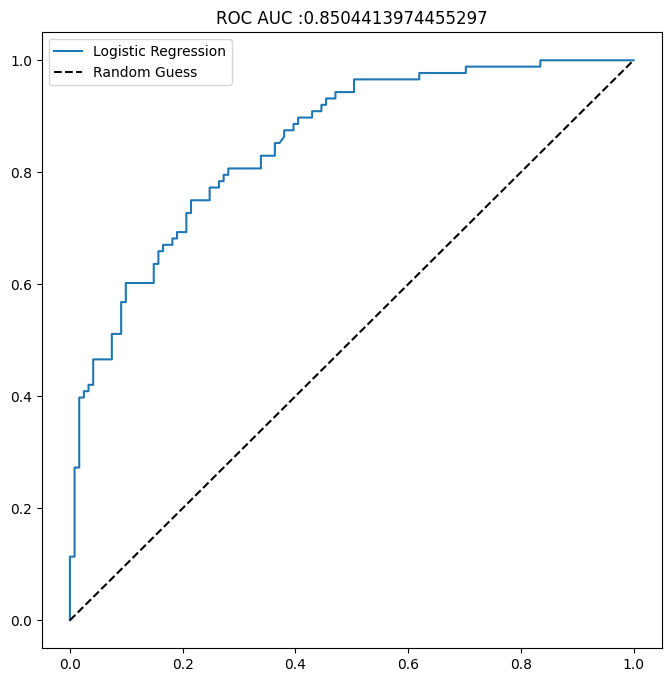

In [49]:
#ROC 커브 코드
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_proba_1 = log_reg.predict_proba(X_test)[:, 1]
fall_out, recall, thresholds = roc_curve(y_test, pred_proba_1)

plt.figure(figsize=(8,8))
plt.plot(fall_out, recall, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title("ROC AUC :" + str(roc_auc_score(y_test, pred_proba_1)))
plt.legend()
plt.show()



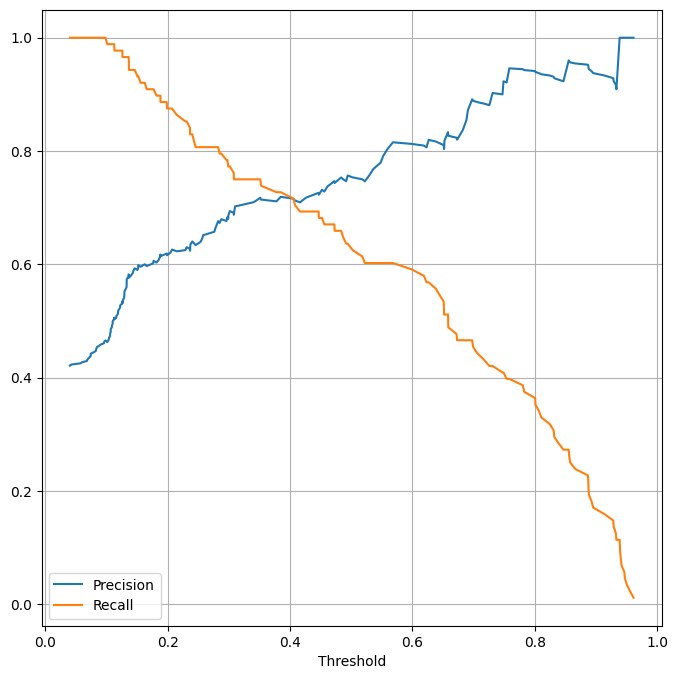

In [50]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, pred_proba_1)

plt.figure(figsize=(8,8))
plt.plot(threshold, precision[:len(threshold)], label='Precision')
plt.plot(threshold, recall[:len(threshold)], label='Recall')
plt.xlabel('Threshold')
plt.grid()
plt.legend()
plt.show()

